<a href="https://colab.research.google.com/github/niemand-01/ML-Demo/blob/master/Kmeans_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import logging

tf.get_logger().setLevel(logging.ERROR)

In [10]:
X,y = make_blobs(n_samples=100,n_features=2,centers=4)
print(y)
# print(X)

[3 0 2 3 3 3 1 1 2 2 0 3 0 1 2 2 0 0 0 1 2 1 1 0 2 1 0 1 0 3 0 2 0 1 0 3 2
 3 1 2 0 2 0 0 2 2 3 3 1 0 2 0 3 1 1 2 1 2 1 3 1 3 1 3 3 2 0 2 0 0 3 0 1 3
 1 1 3 3 1 3 2 0 2 3 2 1 3 0 2 0 0 2 1 2 1 3 3 3 1 2]


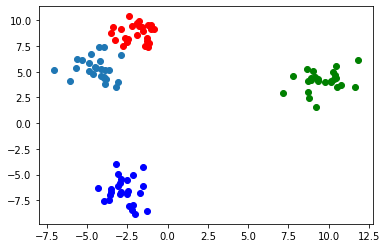

In [15]:
# X[y==0,0] means the corresponding X[i][0] when y[i]==0
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1], c='r')
plt.scatter(X[y==2,0], X[y==2, 1], c='b')
plt.scatter(X[y==3,0], X[y==3, 1], c='g')

score: 3742.495
delta: [[ 5.307916   -1.8577518 ]
 [-1.3544471  -1.0755668 ]
 [ 0.81968665  0.35178947]]
score: 1515.5103
delta: [[ 1.8968477  -0.78393936]
 [ 0.69366693  0.9756317 ]
 [ 0.01607227  0.00689793]]
score: 845.43646
delta: [[ 0.9388437  -0.3880105 ]
 [ 0.1517396   0.21341944]
 [ 0.00549841  0.00235987]]
score: 652.7736
delta: [[ 0.56027794 -0.23155451]
 [ 0.06649256  0.09352064]
 [ 0.00277638  0.00119162]]
score: 566.7838
delta: [[ 0.3187785  -0.13174677]
 [ 0.03061533  0.04305983]
 [ 0.00139737  0.00059986]]
score: 526.94086
delta: [[ 0.2386837  -0.09864426]
 [ 0.02128148  0.02993202]
 [ 0.0010004   0.00042915]]
score: 501.24368
delta: [[ 0.18540621 -0.07662535]
 [ 0.01565146  0.02201319]
 [ 0.0007515   0.00032234]]
score: 483.7039
delta: [[ 0.1647129  -0.06807375]
 [ 0.01358104  0.01910162]
 [ 0.00065804  0.00028229]]
score: 469.87976
delta: [[ 0.13163853 -0.05440426]
 [ 0.01040792  0.0146389 ]
 [ 0.0005126   0.00021982]]
score: 460.02325
cluster centers: [[ 8.436337   4.

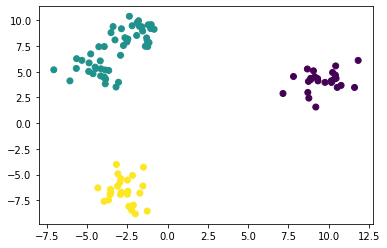

In [18]:
# config
# batch_size =10

# cluster number
cluster_num = 3 

# placeholder
# xi = tf.placeholder(dtype=tf.float32,shape=[None,784])
# yi = tf.placeholder(dtype=tf.float32,shape=[None,10])

# prepare input data
def input_fn():
  return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(X,dtype=tf.float32),num_epochs=1)

kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=cluster_num,use_mini_batch=True)

# train
num_iterations = 10
previous_cenetrs = None
for _ in range(num_iterations):
  # kmeans is a unsupervised learning, only feed in data without label y
  kmeans.train(input_fn)
  # after each iteration/epoch calculate new cluster centers
  cluster_centers = kmeans.cluster_centers()
  if previous_cenetrs is not None:
    print('delta:',cluster_centers - previous_cenetrs)
  previous_cenetrs = cluster_centers
  # implicit score ?
  print('score:',kmeans.score(input_fn))
print('cluster centers:',cluster_centers)

# predict
cluster_indices = list(kmeans.predict_cluster_index(input_fn))

# visualize
plt.scatter(X[:,0],X[:,1],c=cluster_indices,cmap='viridis')